### **COMPARATIVE ANALYSIS**
We will now conduct a **comparative analysis** across the two platforms to identify overarching trends, disparities, and ultimately determine which films are regarded as the greatest based on combined metrics from IMDb and Rotten Tomatoes.

we will merge the datasets to create a unified dataset that contains only the films that are common across IMDb and Rotten Tomatoes. This will allow for a consistent basis of comparison across key metrics such as ratings, genres, total reviews, and more.

In [5]:
 # Importing the Necessary Libraries 
import pandas as pd 
import json 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [6]:
IMDB_df = pd.read_csv( 'CLEANED_IMDB_DATA.csv' )
Rotten_Tomatoes_df = pd.read_csv( 'CLEAN_ROTTEN_TOMATOES_DATA.CSV')

In [7]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [8]:
# Merge IMDB and Letterboxd
merged_data = pd.merge(IMDB_df, Rotten_Tomatoes_df , how = 'inner' , on=['Title', 'Year','Director'], suffixes=('_IMDB', '_RottenT'))

# Display the merged data
display(merged_data)


,Title,Link_IMDB,Year,Rating_Classification_IMDB,Total_Ratings_IMDB,Average_Rating,Director,Runtime_IMDB,Genre_IMDB,Link_RottenT,Rating_Classification_RottenT,Total_Ratings_RottenT,Critic_Score,Audience_Score,Genre_RottenT,Runtime_RottenT
0,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,R,2100000,9.2,Francis Ford Coppola,175,Epic,https://www.rottentomatoes.com/m/the_godfather,R,250000,97,98,Crime,177
1,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=cht...,2008,PG-13,3000000,9.0,Christopher Nolan,152,Action Epic,https://www.rottentomatoes.com/m/the_dark_knight,PG-13,250000,94,94,Action,152
2,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=cht...,1957,Approved,902000,9.0,Sidney Lumet,96,Legal Drama,https://www.rottentomatoes.com/m/1000013_12_an...,Not Rated,100000,100,97,Drama,95
3,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/?ref_=cht...,2003,PG-13,2000000,9.0,Peter Jackson,201,Adventure Epic,https://www.rottentomatoes.com/m/the_lord_of_t...,PG-13,250000,94,86,Fantasy,250
4,Schindler's List,https://www.imdb.com/title/tt0108052/?ref_=cht...,1993,R,1500000,9.0,Steven Spielberg,195,Docudrama,https://www.rottentomatoes.com/m/schindlers_list,R,250000,98,97,History,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,The Iron Giant,https://www.imdb.com/title/tt0129167/?ref_=cht...,1999,PG,238000,8.1,Brad Bird,86,Alien Invasion,https://www.rottentomatoes.com/m/iron_giant,PG,100000,96,90,Kids & Family,86
95,The Grapes of Wrath,https://www.imdb.com/title/tt0032551/?ref_=cht...,1940,Approved,103000,8.1,John Ford,129,Drama,https://www.rottentomatoes.com/m/grapes_of_wrath,Not Rated,10000,100,88,Drama,129
96,Groundhog Day,https://www.imdb.com/title/tt0107048/?ref_=cht...,1993,PG,704000,8.0,Harold Ramis,101,Feel-Good Romance,https://www.rottentomatoes.com/m/groundhog_day,PG,250000,94,88,Romance,96
97,Rebecca,https://www.imdb.com/title/tt0032976/?ref_=cht...,1940,Approved,151000,8.1,Alfred Hitchcock,130,Dark Romance,https://www.rottentomatoes.com/m/1017293-rebecca,Not Rated,25000,98,92,Mystery & Thriller,130


From the merged dataset, we observe that **a total of 105 films are common between IMDb and Rotten Tomatoes**.  
To streamline our analysis and focus on key metrics, we will proceed to **drop non-essential columns**, retaining only the following for further examination:

- `Total_Ratings` (from IMDb)  
- `Average_Rating` (from IMDb)  
- `Critic_Score` (from Rotten Tomatoes)  
- `Audience_Score` (from Rotten Tomatoes)

In [9]:
display(merged_data.describe())
display(merged_data.describe( include = ['object', 'category']))


,Year,Total_Ratings_IMDB,Average_Rating,Runtime_IMDB,Total_Ratings_RottenT,Critic_Score,Audience_Score,Runtime_RottenT
count,99.000000,9.900000e+01,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000
mean,1982.828283,7.481111e+05,8.332323,126.505051,127979.79798,95.868687,93.161616,126.232323
std,26.438238,5.728185e+05,0.257867,27.903395,102207.56989,2.697869,2.743107,29.790366
min,1927.000000,4.600000e+04,8.000000,80.000000,5000.00000,89.000000,86.000000,77.000000
25%,1958.000000,2.565000e+05,8.100000,107.000000,25000.00000,94.000000,91.500000,107.000000
50%,1988.000000,7.090000e+05,8.300000,124.000000,100000.00000,96.000000,94.000000,124.000000
75%,2003.500000,1.050000e+06,8.500000,138.000000,250000.00000,98.000000,95.000000,137.000000
max,2023.000000,3.000000e+06,9.200000,227.000000,250000.00000,100.000000,99.000000,250.000000


,Title,Link_IMDB,Rating_Classification_IMDB,Director,Genre_IMDB,Link_RottenT,Rating_Classification_RottenT,Genre_RottenT
count,99,99,99,99,99,99,99,99
unique,99,99,6,69,49,99,5,17
top,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,R,Billy Wilder,Adventure Epic,https://www.rottentomatoes.com/m/the_godfather,R,Drama
freq,1,1,35,5,7,1,36,16


**Descriptive Summary of the Merged Dataset**

1. **Total Ratings**:  
   - From IMDb, the mean number of total ratings is **730,695.23**, with values ranging from **46,000** to **3,000,000**.  
   - From Rotten Tomatoes, the mean is **126,095.23**, with a minimum of **5,000** and a maximum of **250,000**.

2. **Release Years**:  
   - The film in the merged dataset span from **1921 to 2023**.

3. **Ratings Overview**:  
   - The **Average IMDb Rating** is **8.3** out of 10, with values ranging between **8.0** and **9.2**.  
   - The **Critic Score** (Rotten Tomatoes) averages **95.96** out of 100, ranging from **89** to **100**.  
   - The **Audience Score** (Rotten Tomatoes) has an average of **93.12**, with scores between **86** and **99**.

4. **Rating Classifications**:  
   - The most common rating classification is **"R"**, appearing **36 times** in IMDb and **37 times** in Rotten Tomatoes.

5. **Genres**:  
   - In IMDb, the most prevalent genre is **Adventure Epic**, appearing **7 times**.  
   - In Rotten Tomatoes, **Drama** is the most common genre, appearing **16 times**.

6. **Directors**:  
   - The director with the most film in the merged dataset is **Billy Wilder**, with a total of **5 films**.


In [10]:
 # Dropping the columns
Merged_Data = merged_data[['Title','Year','Director','Total_Ratings_IMDB','Average_Rating','Total_Ratings_RottenT','Critic_Score','Audience_Score']]

display(Merged_Data)

,Title,Year,Director,Total_Ratings_IMDB,Average_Rating,Total_Ratings_RottenT,Critic_Score,Audience_Score
0,The Godfather,1972,Francis Ford Coppola,2100000,9.2,250000,97,98
1,The Dark Knight,2008,Christopher Nolan,3000000,9.0,250000,94,94
2,12 Angry Men,1957,Sidney Lumet,902000,9.0,100000,100,97
3,The Lord of the Rings: The Return of the King,2003,Peter Jackson,2000000,9.0,250000,94,86
4,Schindler's List,1993,Steven Spielberg,1500000,9.0,250000,98,97
...,...,...,...,...,...,...,...,...
94,The Iron Giant,1999,Brad Bird,238000,8.1,100000,96,90
95,The Grapes of Wrath,1940,John Ford,103000,8.1,10000,100,88
96,Groundhog Day,1993,Harold Ramis,704000,8.0,250000,94,88
97,Rebecca,1940,Alfred Hitchcock,151000,8.1,25000,98,92


<Figure size 2000x1000 with 0 Axes>

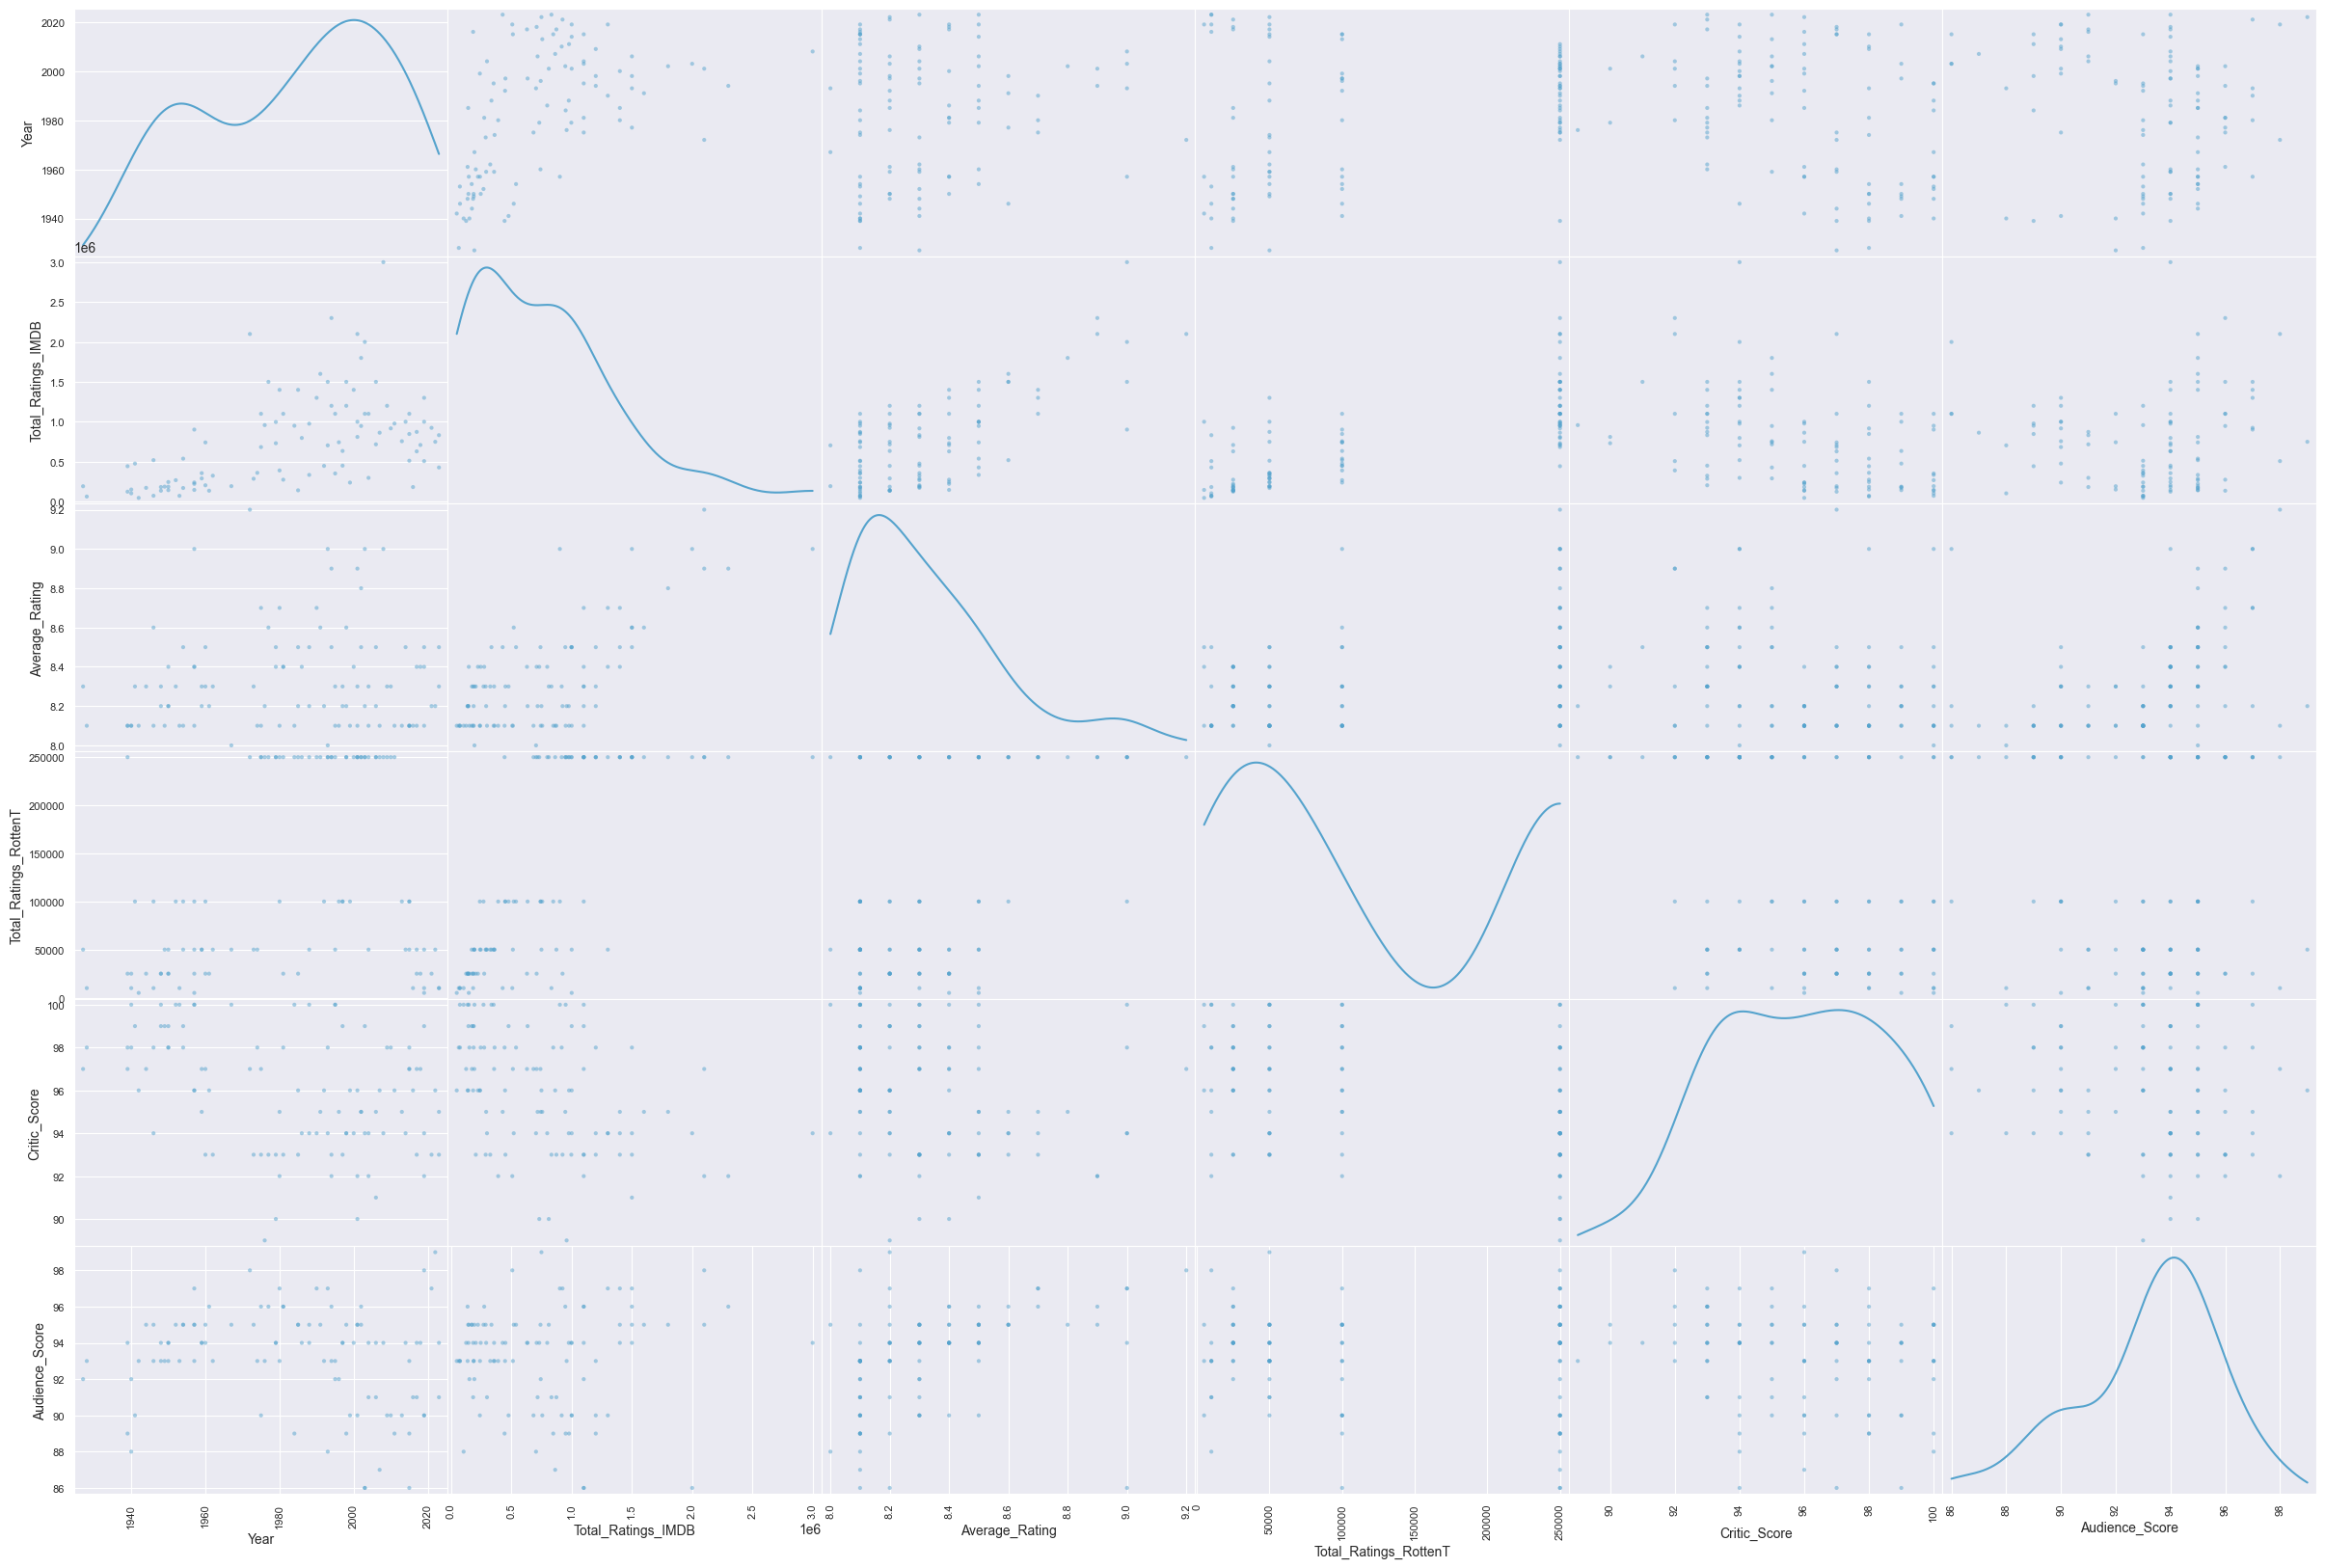

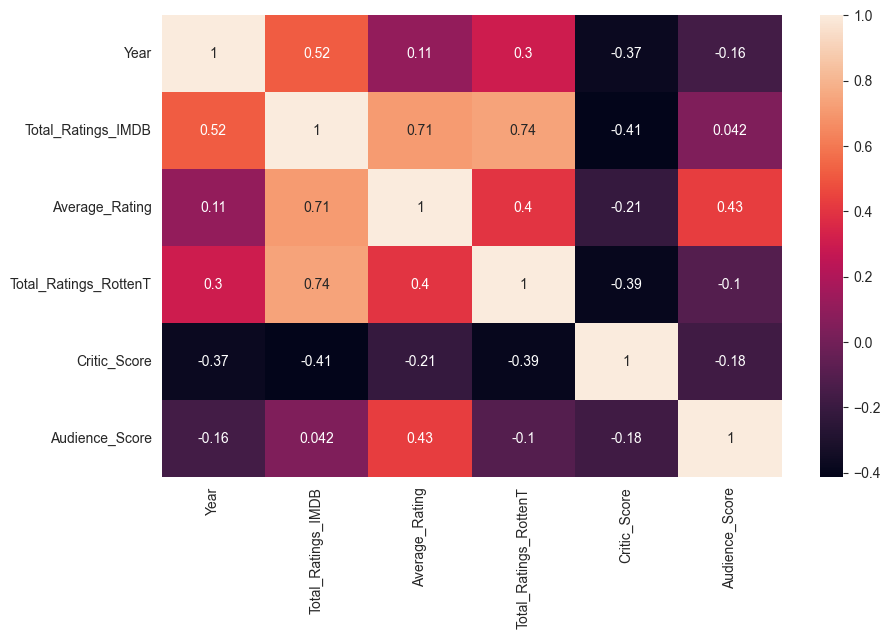

In [11]:
 # Getting the Numerical data
Merged_nums = Merged_Data.select_dtypes( include = ['float64','int64'])

 # plotting Scatter Matrix
plt.figure( figsize = (20,10) )
pd.plotting.scatter_matrix( Merged_nums , figsize = ( 30 , 20 ) , diagonal = 'kde' )

 # Correlation
corr = Merged_nums.corr()

 # ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap( corr ,annot = True )


plt.show() 

Relationship Between Variables:

1. There is no evident linear relationship among the variables, as shown in the scatter plots.

Distribution Observations:

1. Total_Ratings_IMDB and Average_Rating are right-skewed, indicating that a majority of films have lower ratings or fewer total ratings, with a few outliers having very high values.

2. Audience_Score appears to be normally distributed, suggesting consistent audience reception across most films.

3. Total_Ratings_RottenT exhibits a bimodal (M-shaped) distribution, indicating two distinct peaks in the number of ratings.

Correlation Analysis:

1. According to the covariance matrix, Average_Rating and Total_Ratings_IMDB exhibit a moderate positive correlation, with a coefficient of 0.71, indicating that films with higher average ratings tend to attract more IMDb ratings. Additionally, Total_Ratings_RottenT and Total_Ratings_IMDB show a positive correlation of 0.74, suggesting that films popular on one platform are also likely to be popular on the other.

<function matplotlib.pyplot.show(close=None, block=None)>

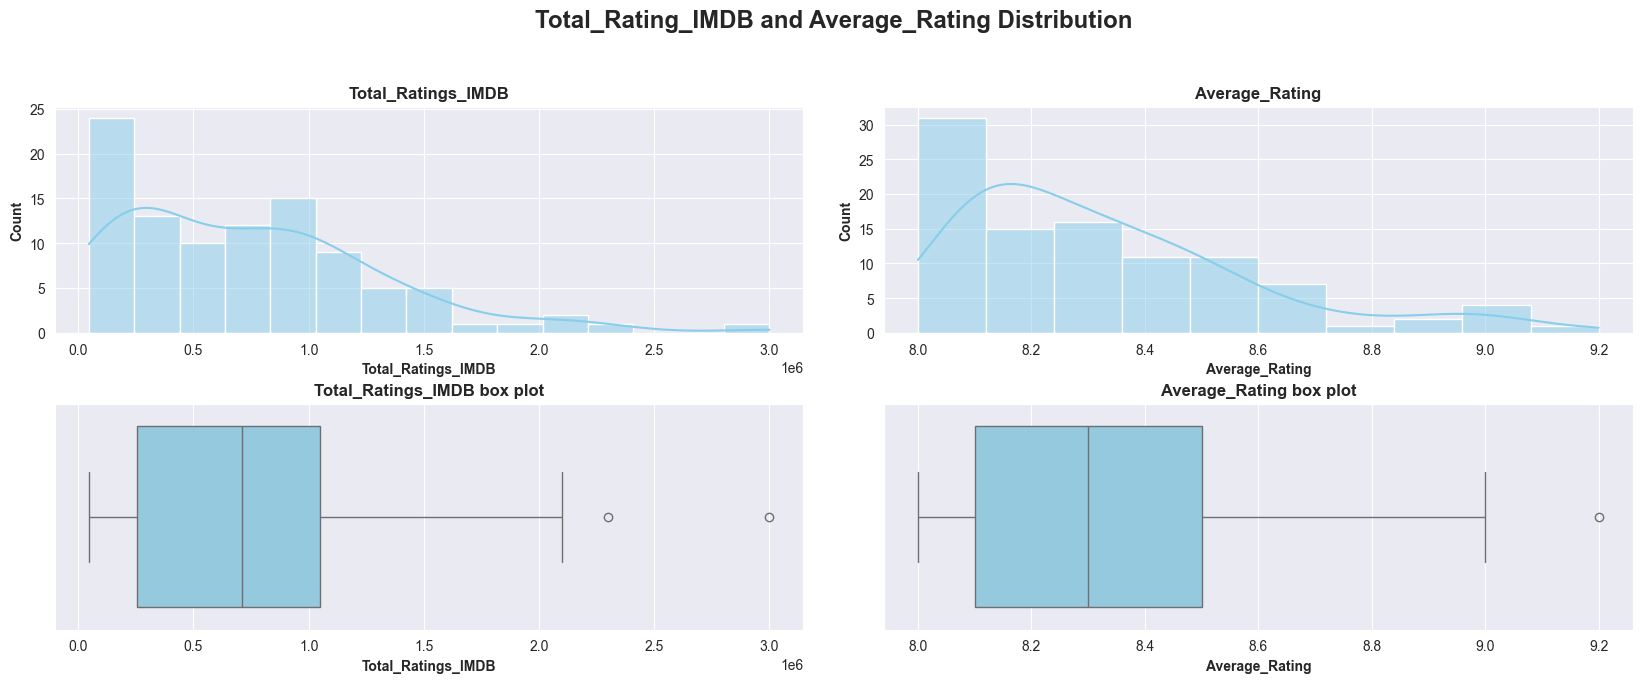

In [12]:
 # Plotting histograms
fig,ax = plt.subplots( 2 , 2 , figsize = (17 ,7) )
 # Heading of the whole plot 
fig.suptitle( 'Total_Rating_IMDB and Average_Rating Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0,0] , data = Merged_Data , x = 'Total_Ratings_IMDB' , bins = 15 , kde = True , color = 'skyblue' )
sns.histplot( ax = ax[0,1] , data = Merged_Data , x = 'Average_Rating' , bins = 10 , kde = True , color = 'skyblue' )
sns.boxplot( ax=ax[1,0], data=Merged_Data, x='Total_Ratings_IMDB', color='skyblue')
sns.boxplot( ax=ax[1,1], data=Merged_Data, x='Average_Rating', color='skyblue')

ax[0,0].set_xlabel( 'Total_Ratings_IMDB' , fontweight = 'bold' )
ax[0,1].set_xlabel( 'Average_Rating' , fontweight = 'bold' )
ax[1,0].set_xlabel( 'Total_Ratings_IMDB' , fontweight = 'bold' )
ax[1,1].set_xlabel( 'Average_Rating' , fontweight = 'bold' )

ax[0,0].set_ylabel( 'Count' , fontweight = 'bold' )
ax[0,1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0,0].set_title( 'Total_Ratings_IMDB',fontweight = 'bold' )
ax[0,1].set_title( 'Average_Rating',fontweight = 'bold' )
ax[1,0].set_title( 'Total_Ratings_IMDB box plot',fontweight = 'bold' )
ax[1,1].set_title( 'Average_Rating box plot',fontweight = 'bold' )

plt.show

The distribution plots confirm that both Total_Ratings_IMDB and Average_Rating are right-skewed, indicating that a smaller number of films receive significantly higher ratings or total votes compared to the majority. Additionally, the box plots reveal the presence of outliers in these variables, which further supports the observation that a few films dominate in terms of popularity and rating metrics.

<function matplotlib.pyplot.show(close=None, block=None)>

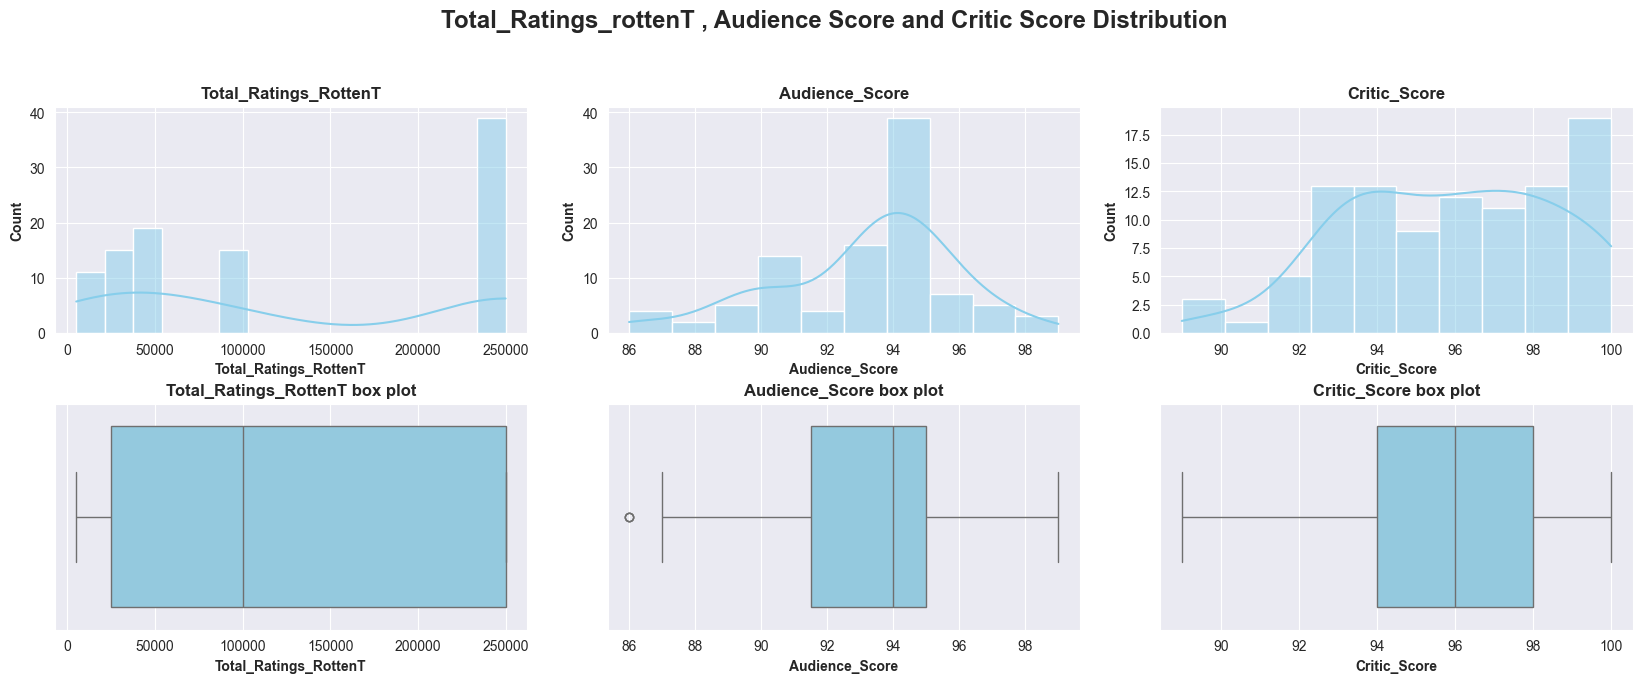

In [13]:
 # Plotting histograms
fig,ax = plt.subplots( 2 , 3 , figsize = (17 ,7) )
 # Heading of the whole plot 
fig.suptitle( 'Total_Ratings_rottenT , Audience Score and Critic Score Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0,0] , data = Merged_Data , x = 'Total_Ratings_RottenT' , bins = 15 , kde = True , color = 'skyblue' )
sns.histplot( ax = ax[0,1] , data = Merged_Data , x = 'Audience_Score' , bins = 10 , kde = True , color = 'skyblue' )
sns.histplot( ax = ax[0,2] , data = Merged_Data , x = 'Critic_Score' , bins = 10 , kde = True , color = 'skyblue' )
sns.boxplot( ax=ax[1,0], data=Merged_Data, x='Total_Ratings_RottenT', color='skyblue')
sns.boxplot( ax=ax[1,1], data=Merged_Data, x='Audience_Score', color='skyblue')
sns.boxplot( ax=ax[1,2], data=Merged_Data, x='Critic_Score', color='skyblue')

ax[0,0].set_xlabel( 'Total_Ratings_RottenT' , fontweight = 'bold' )
ax[0,1].set_xlabel( 'Audience_Score' , fontweight = 'bold' )
ax[0,2].set_xlabel( 'Critic_Score' , fontweight = 'bold' )
ax[1,0].set_xlabel( 'Total_Ratings_RottenT' , fontweight = 'bold' )
ax[1,1].set_xlabel( 'Audience_Score' , fontweight = 'bold' )
ax[1,2].set_xlabel( 'Critic_Score' , fontweight = 'bold' )

ax[0,0].set_ylabel( 'Count' , fontweight = 'bold' )
ax[0,1].set_ylabel( 'Count' , fontweight = 'bold' )
ax[0,2].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0,0].set_title( 'Total_Ratings_RottenT',fontweight = 'bold' )
ax[0,1].set_title( 'Audience_Score',fontweight = 'bold' )
ax[0,2].set_title( 'Critic_Score',fontweight = 'bold' )
ax[1,0].set_title( 'Total_Ratings_RottenT box plot',fontweight = 'bold' )
ax[1,1].set_title( 'Audience_Score box plot',fontweight = 'bold' )
ax[1,2].set_title( 'Critic_Score box plot',fontweight = 'bold' )

plt.show

We Observe That 
1. Total_Ratings_RottenT exhibits a prominent peak at **250,000 total ratings**, with over **40 films** reaching this value, which confirms that 250,000 as the upper limit .
2. The Audience_Score appears to follow a **normal distribution**, indicating consistent audience feedback across the films.
3. The Critic_Score distribution is **nearly symmetrical**, though it shows a **slight left skew**, implying that a majority of films received relatively high critical acclaim with a few exceptions.

### **Next Steps: Developing a Unified Scoring System for Film Ranking**

1. **Normalize Rating Metrics**  
   To ensure consistency across the two platforms, we will normalize all rating metrics to a common scale:
   - **IMDb Average Rating** will be normalized by dividing the score by **10** (as it is originally out of 10).
   - **Rotten Tomatoes' Critic Score** and **Audience Score** will be normalized by dividing each score by **100** (since they are originally out of 100).

2. **Normalize Popularity Metrics**  
   The total number of ratings from both platforms will be normalized using **logarithmic scaling**. This transformation helps in compressing the wide range of values into a more manageable scale while preserving relative differences:
   - Calculate the log-scaled values of **Total_Ratings_IMDB** and **Total_Ratings_RottenT**.
   - Compute the **average** of these two log-transformed values to generate a **Populatity Score**.

3. **Assign Platform Weights**  
   We will assign **weights**(equal weights) to each rating metric based on the **relative popularity and influence** of the respective platforms. This weighted approach will help create a more balanced and representative **final score** for each film.

In [14]:
 # Normalizing the average rating , Critic Score and Audience score 
Merged_Data = Merged_Data.copy()

# Then do the dtype conversion and scaling
Merged_Data['Average_Rating'] = round(Merged_Data['Average_Rating']/10, 2)
Merged_Data['Audience_Score'] = Merged_Data['Audience_Score']/100
Merged_Data['Critic_Score'] = Merged_Data['Critic_Score']/100
Merged_Data['Year'] = Merged_Data['Year']
Merged_Data['Director'] = Merged_Data['Director']

display(Merged_Data)

,Title,Year,Director,Total_Ratings_IMDB,Average_Rating,Total_Ratings_RottenT,Critic_Score,Audience_Score
0,The Godfather,1972,Francis Ford Coppola,2100000,0.92,250000,0.97,0.98
1,The Dark Knight,2008,Christopher Nolan,3000000,0.90,250000,0.94,0.94
2,12 Angry Men,1957,Sidney Lumet,902000,0.90,100000,1.00,0.97
3,The Lord of the Rings: The Return of the King,2003,Peter Jackson,2000000,0.90,250000,0.94,0.86
4,Schindler's List,1993,Steven Spielberg,1500000,0.90,250000,0.98,0.97
...,...,...,...,...,...,...,...,...
94,The Iron Giant,1999,Brad Bird,238000,0.81,100000,0.96,0.90
95,The Grapes of Wrath,1940,John Ford,103000,0.81,10000,1.00,0.88
96,Groundhog Day,1993,Harold Ramis,704000,0.80,250000,0.94,0.88
97,Rebecca,1940,Alfred Hitchcock,151000,0.81,25000,0.98,0.92


In [15]:
 # Scalling Total Ratings for both Rotten tomatoes and IMDB
def normalize_log10(series):
    log_vals = np.log10(series.replace(0, np.nan))
    return (log_vals - log_vals.min()) / (log_vals.max() - log_vals.min())

Merged_Data = Merged_Data.copy()

Merged_Data['norm_Total_Ratings_IMDB'] = normalize_log10(Merged_Data['Total_Ratings_IMDB'])
Merged_Data['norm_Total_Ratings_RottenT'] = normalize_log10(Merged_Data['Total_Ratings_RottenT'])

Merged_Data['Popularity_Score'] = ( Merged_Data['norm_Total_Ratings_IMDB'] + Merged_Data['norm_Total_Ratings_RottenT'] ) / 2

display(Merged_Data)

,Title,Year,Director,Total_Ratings_IMDB,Average_Rating,Total_Ratings_RottenT,Critic_Score,Audience_Score,norm_Total_Ratings_IMDB,norm_Total_Ratings_RottenT,Popularity_Score
0,The Godfather,1972,Francis Ford Coppola,2100000,0.92,250000,0.97,0.98,0.914625,1.000000,0.957312
1,The Dark Knight,2008,Christopher Nolan,3000000,0.90,250000,0.94,0.94,1.000000,1.000000,1.000000
2,12 Angry Men,1957,Sidney Lumet,902000,0.90,100000,1.00,0.97,0.712343,0.765776,0.739059
3,The Lord of the Rings: The Return of the King,2003,Peter Jackson,2000000,0.90,250000,0.94,0.86,0.902946,1.000000,0.951473
4,Schindler's List,1993,Steven Spielberg,1500000,0.90,250000,0.98,0.97,0.834085,1.000000,0.917043
...,...,...,...,...,...,...,...,...,...,...,...
94,The Iron Giant,1999,Brad Bird,238000,0.81,100000,0.96,0.90,0.393427,0.765776,0.579601
95,The Grapes of Wrath,1940,John Ford,103000,0.81,10000,1.00,0.88,0.192949,0.177184,0.185066
96,Groundhog Day,1993,Harold Ramis,704000,0.80,250000,0.94,0.88,0.653020,1.000000,0.826510
97,Rebecca,1940,Alfred Hitchcock,151000,0.81,25000,0.98,0.92,0.284518,0.411408,0.347963


In [16]:
 # Assigning Weights to the data
Merged_Data['Final_Score'] = ( 25*Merged_Data['Average_Rating'] ) + ( 25*Merged_Data['Audience_Score'] ) + ( 25*Merged_Data['Critic_Score'] ) + ( 25*Merged_Data['Popularity_Score'])

Films_List = Merged_Data[['Title','Year','Director' ,'Final_Score']].sort_values(by='Final_Score', ascending=False).reset_index( drop = True)

We have successfully created a combined list that highlights the greatest movies of all time, based on an integrated scoring system that considers Total Ratings from both IMDb and Rotten Tomatoes, Critic Score, Audience Score, and Average Rating.

We will now proceed to analyze the finalized list to derive meaningful insights

In [17]:
display(Films_List.describe())

display(Films_List.describe( include = ['object', 'category']))

,Year,Final_Score
count,99.000000,99.000000
mean,1982.828283,84.134702
std,26.438238,6.185041
min,1927.000000,67.500000
25%,1958.000000,79.795721
50%,1988.000000,84.563968
75%,2003.500000,89.171918
max,2023.000000,95.682808


,Title,Director
count,99,99
unique,99,69
top,The Godfather,Billy Wilder
freq,1,5


From the summary statistics, we observe the following:

1. The dataset comprises **99 films**, with a **mean final score** of **83.93**.
2. The **lowest final score** is **67.5**, while the **highest final score** is **95.68**.
3. The films span release years from **1927 to 2023**, with **no films from 2024** included.
4. There are **69 unique directors** represented in the list, with **Billy Wilder** having the most entries, totaling **5 films**.

In [18]:
# Getting the Top 5 films and the Bottom 5 films
display(Films_List.head(5))

display(Films_List.tail(5))


,Title,Year,Director,Final_Score
0,The Godfather,1972,Francis Ford Coppola,95.682808
1,The Dark Knight,2008,Christopher Nolan,94.500000
2,Schindler's List,1993,Steven Spielberg,94.176063
3,Pulp Fiction,1994,Quentin Tarantino,93.455001
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,92.971580


,Title,Year,Director,Final_Score
94,Tokyo Story,1953,Yasujirô Ozu,72.055314
95,The Grapes of Wrath,1940,John Ford,71.876659
96,The Best Years of Our Lives,1946,William Wyler,71.596584
97,The Passion of Joan of Arc,1928,Carl Theodor Dreyer,71.155780
98,To Be or Not to Be,1942,Ernst Lubitsch,67.500000


From the output, we observe the following:

1. **The Godfather** ranks as the greatest film of all time, followed by **The Dark Knight**, with final scores of **95.68** and **92.97**, respectively.
2. **To Be or Not to Be** holds the bottom position, followed by **The Passion of Joan of Arc**, with final scores of **67.5** and **71.15**, respectively.

In [19]:
top_dir = Films_List['Director'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False ).head(5)
bottom_dir = Films_List['Director'].value_counts().sort_values( ascending = True ).to_frame().reset_index( drop = False ).head(5)

display(top_dir)
display(bottom_dir)

,Director,count
0,Billy Wilder,5
1,Martin Scorsese,4
2,Alfred Hitchcock,4
3,Steven Spielberg,4
4,Peter Jackson,3


,Director,count
0,Andrew Stanton,1
1,Harold Ramis,1
2,Victor Fleming,1
3,Curtis Hanson,1
4,Guillermo del Toro,1


Based on the output, Billy Wilder holds the highest number of entries, with five films included in the list. Martin Scorsese, Alfred Hitchcock, and Steven Spielberg each have four films represented, while Peter Jackson follows closely with three films featured. 

In [20]:
dir_counts = Films_List['Director'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False )

x = dir_counts['count'] == 1
y = dir_counts['count'] > 1

print(((dir_counts[x]).shape)[0])
print(((dir_counts[y]).shape)[0])

52
17


There are a total of 52 directors who have only one film featured in the list, while 17 directors have multiple films included in the entry.

In [21]:
 # Checking the psition where the top 5 directors films are  
a = 'Billy Wilder'
b = 'Martin Scorsese'
c = 'Alfred Hitchcock'
d = 'Steven Spielberg'
e = 'Peter Jackson'

display(Films_List[Films_List['Director'] == a])
display(Films_List[Films_List['Director'] == b])
display(Films_List[Films_List['Director'] == c])
display(Films_List[Films_List['Director'] == d])
display(Films_List[Films_List['Director'] == e])

,Title,Year,Director,Final_Score
65,Sunset Boulevard,1950,Billy Wilder,81.361966
67,Some Like It Hot,1959,Billy Wilder,80.616495
79,Double Indemnity,1944,Billy Wilder,77.838686
87,The Apartment,1960,Billy Wilder,77.099208
93,Witness for the Prosecution,1957,Billy Wilder,73.205723


,Title,Year,Director,Final_Score
8,Goodfellas,1990,Martin Scorsese,91.997897
17,The Departed,2006,Martin Scorsese,90.426063
35,Taxi Driver,1976,Martin Scorsese,87.584506
56,Raging Bull,1980,Martin Scorsese,82.467737


,Title,Year,Director,Final_Score
38,Psycho,1960,Alfred Hitchcock,87.138201
39,Rear Window,1954,Alfred Hitchcock,86.430318
61,North by Northwest,1959,Alfred Hitchcock,81.980016
90,Rebecca,1940,Alfred Hitchcock,76.449077


,Title,Year,Director,Final_Score
2,Schindler's List,1993,Steven Spielberg,94.176063
10,Saving Private Ryan,1998,Steven Spielberg,91.676063
18,Raiders of the Lost Ark,1981,Steven Spielberg,90.248062
36,Jaws,1975,Steven Spielberg,87.572135


,Title,Year,Director,Final_Score
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,92.971580
5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,92.932808
11,The Lord of the Rings: The Return of the King,2003,Peter Jackson,91.286825


From the output, we observe the following:

1. **Billy Wilder's** highest-ranked film is *Sunset Boulevard* at position **33**, while his lowest-ranked film is *Witness for the Prosecution* at position **65**.
2. **Martin Scorsese's** highest-ranked film is *Goodfellas* at position **8**, while his lowest-ranked film is *Raging Bull* at position **56**.
3. **Alfred Hitchcock's** highest-ranked film is *Psycho* at position **38**, while his lowest-ranked film is *Rebecca* at position **90**.
4. **Steven Spielberg's** highest-ranked film is *Schindler's List* at position **2**, while his lowest-ranked film is *Jaws* at position **36**.
5. **Peter Jackson's** highest-ranked film is *The Lord of the Rings: The Two Towers* at position **4**, while his lowest-ranked film is *The Lord of the Rings: The Return of the King* at position **11**.

### **CONCLUSION**

The **final list of the greatest movies** reveals that **The Godfather** holds the top spot with a score of **95.68**, followed by **The Dark Knight** at **92.97**. The list includes **99 films**, spanning from **1927 to 2023**. 

**Billy Wilder** is the most featured director with **5 films**, followed by **Martin Scorsese**, **Alfred Hitchcock**, **Steven Spielberg** (each with **4 films**), and **Peter Jackson** (with **3 films**). A total of **52 directors** have one film in the list, while **17** have more than one.

Notable rankings include:
- **Wilder**’s highest film: *Sunset Boulevard* (33), lowest: *Witness for the Prosecution* (65)
- **Scorsese**: *Goodfellas* (8), *Raging Bull* (56)
- **Spielberg**: *Schindler’s List* (2), *Jaws* (36)
- **Jackson**: *The Two Towers* (4), *The Return of the King* (11)

This list highlights the lasting impact of both classic and contemporary filmmakers on the cinematic landscape.

In [22]:
 # Dropping the Final score column
Final_List = Films_List[['Title','Year','Director']]

In [23]:
 # Saving in a csv file
Final_List.to_csv( 'Greatest Films of all Time.csv' )